In [1]:
import pandas as pd
import numpy as np

In [2]:
fake = pd.read_csv(r"Fake.csv")
true = pd.read_csv(r"True.csv")

In [3]:
fake['label'] = 0
true['label'] = 1

In [4]:
data = pd.concat([true,fake],ignore_index=True)

In [5]:
data.sample(5)

,title,text,subject,date,label
25862,S.C. Sheriff’s Dept. Just Said Townville Shoo...,A teen opened fire at an elementary school in ...,News,"September 28, 2016",0
35984,OBAMA THROWS HILLARY UNDER THE BUS: E-mail Sca...,Obama decides to throw Hillary under the bus I...,politics,"Jan 30, 2016",0
44279,"BRONX HOSPITAL SHOOTING: Multiple People Shot,...",21st Century Wire says Several people have bee...,Middle-east,"June 30, 2017",0
8292,"Obama visits Midway Atoll, a symbol of his cli...",MIDWAY ATOLL (Reuters) - President Barack Obam...,politicsNews,"September 1, 2016",1
34559,LIBERAL HUMOR? FLORIDA BAR POSTS SIGN Suggesti...,It s a federal offense to threaten a president...,politics,"Aug 28, 2016",0


In [6]:
data.shape

(44898, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [8]:
data.duplicated().sum()

209

In [9]:
data=data.drop_duplicates()

In [10]:
data.duplicated().sum()

0

In [11]:
data.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

## Note:
* since our goal is to detect fake news, the most imp columns are: title,text and label
* so we can drop date and subject columns
* alse we merge title and text columns as one column say 'content'

In [12]:
data['content'] = data['title'] + " " + data['text']

In [13]:
data.drop(['title','subject','text','date'],axis=1,inplace=True)

In [14]:
data.head()

,label,content
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44689 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    44689 non-null  int64 
 1   content  44689 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [16]:
data['label'].value_counts()

label
0    23478
1    21211
Name: count, dtype: int64

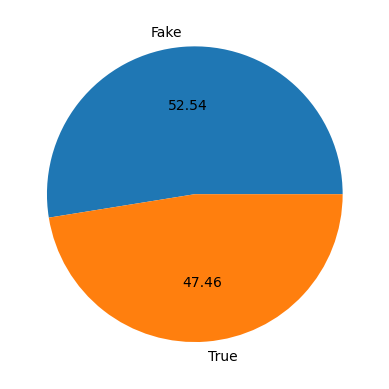

In [17]:
import matplotlib.pyplot as plt

plt.pie(data['label'].value_counts(),labels=['Fake','True'],autopct='%0.2f')
plt.show()

### insights:
* we can that fake news are more in number than the True news

In [18]:
import nltk

## number of characters in each content
data['num_characters'] = data['content'].apply(len)


## number of words in each content
data['num_words'] = data['content'].apply(lambda x:len(nltk.word_tokenize(x)))


## number of sentences in each content
data['num_sentences'] = data['content'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [19]:
data.head()

,label,content,num_characters,num_words,num_sentences
0,1,"As U.S. budget fight looms, Republicans flip t...",4724,896,30
1,1,U.S. military to accept transgender recruits o...,4142,723,21
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,2850,535,17
3,1,FBI Russia probe helped by Australian diplomat...,2521,447,16
4,1,Trump wants Postal Service to charge 'much mor...,5274,999,40


In [20]:
data.describe()

,label,num_characters,num_words,num_sentences
count,44689.000000,44689.000000,44689.000000,44689.000000
mean,0.474636,2548.274005,467.756786,14.988006
std,0.499362,2174.594406,395.267696,12.676240
min,0.000000,31.000000,5.000000,1.000000
25%,0.000000,1314.000000,240.000000,7.000000
50%,0.000000,2268.000000,417.000000,13.000000
75%,1.000000,3186.000000,587.000000,19.000000
max,1.000000,51893.000000,9970.000000,321.000000


In [21]:
## describe of only fake news

data[data['label']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,23478.000000,23478.000000,23478.000000
mean,2642.749936,488.163387,15.161428
std,2533.838628,457.132559,13.745278
min,31.000000,6.000000,1.000000
25%,1530.250000,284.000000,7.000000
50%,2259.000000,420.000000,13.000000
75%,3126.000000,581.000000,19.000000
max,51893.000000,9970.000000,288.000000


In [22]:
## describe of only True news

data[data['label']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,21211.000000,21211.000000,21211.000000
mean,2443.700627,445.169158,14.796049
std,1684.042483,311.292069,11.373650
min,32.000000,5.000000,1.000000
25%,971.500000,177.000000,6.000000
50%,2282.000000,413.000000,13.000000
75%,3291.500000,598.000000,20.000000
max,29849.000000,5988.000000,321.000000


### insights:

* we can the count of num_characters,num_words and num_sentences of fake news are more than the True news

<Axes: >

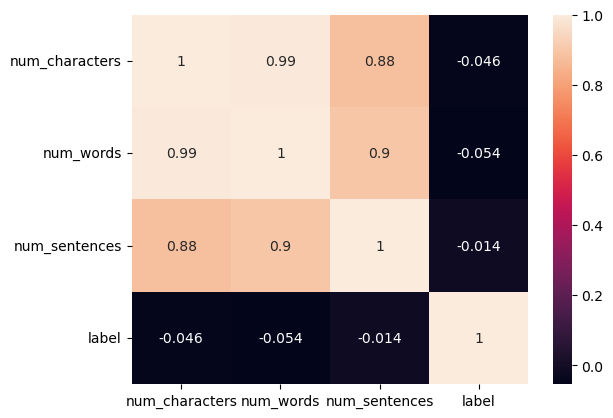

In [23]:
import seaborn as sns
sns.heatmap(data[['num_characters','num_words','num_sentences','label']].corr(),annot=True)

## Data Preprocessing

1. Lower case
2. Remove puntucations
3. Remove stopwords
4. Tokenization
5. Stemming 

In [24]:
import nltk
nltk.download('stopwords')

## stop words
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SRINIJA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [27]:
def clean_text(text):
    # Step 1: Lowercase
    text = text.lower()

    # Step 2: Tokenize
    tokens = nltk.word_tokenize(text)

    # Step 3: Remove non-alphanumeric tokens
    tokens = [word for word in tokens if word.isalnum()]

    # Step 4: Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]

    # Step 5: Stemming
    stemmed = [ps.stem(word) for word in tokens]

    # Step 6: Return cleaned string
    return " ".join(stemmed)

In [28]:
clean_text("I love watching movies")

'love watch movi'

In [29]:
clean_text("can I TalK to You noW??")

'talk'

In [30]:
data['content'][1]

'U.S. military to accept transgender recruits on Monday: Pentagon WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District 

In [31]:
clean_text('U.S. military to accept transgender recruits on Monday: Pentagon WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District Court in the meantime,” the official said, speaking on condition of anonymity. In September, the Pentagon said it had created a panel of senior officials to study how to implement a directive by Trump to prohibit transgender individuals from serving. The Defense Department has until Feb. 21 to submit a plan to Trump. Lawyers representing currently-serving transgender service members and aspiring recruits said they had expected the administration to appeal the rulings to the conservative-majority Supreme Court, but were hoping that would not happen. Pentagon spokeswoman Heather Babb said in a statement: “As mandated by court order, the Department of Defense is prepared to begin accessing transgender applicants for military service Jan. 1. All applicants must meet all accession standards.” Jennifer Levi, a lawyer with gay, lesbian and transgender advocacy group GLAD, called the decision not to appeal “great news.” “I’m hoping it means the government has come to see that there is no way to justify a ban and that it’s not good for the military or our country,” Levi said. Both GLAD and the American Civil Liberties Union represent plaintiffs in the lawsuits filed against the administration. In a move that appealed to his hard-line conservative supporters, Trump announced in July that he would prohibit transgender people from serving in the military, reversing Democratic President Barack Obama’s policy of accepting them. Trump said on Twitter at the time that the military “cannot be burdened with the tremendous medical costs and disruption that transgender in the military would entail.” Four federal judges - in Baltimore, Washington, D.C., Seattle and Riverside, California - have issued rulings blocking Trump’s ban while legal challenges to the Republican president’s policy proceed. The judges said the ban would likely violate the right under the U.S. Constitution to equal protection under the law. The Pentagon on Dec. 8 issued guidelines to recruitment personnel in order to enlist transgender applicants by Jan. 1. The memo outlined medical requirements and specified how the applicants’ sex would be identified and even which undergarments they would wear. The Trump administration previously said in legal papers that the armed forces were not prepared to train thousands of personnel on the medical standards needed to process transgender applicants and might have to accept “some individuals who are not medically fit for service.” The Obama administration had set a deadline of July 1, 2017, to begin accepting transgender recruits. But Trump’s defense secretary, James Mattis, postponed that date to Jan. 1, 2018, which the president’s ban then put off indefinitely. Trump has taken other steps aimed at rolling back transgender rights. In October, his administration said a federal law banning gender-based workplace discrimination does not protect transgender employees, reversing another Obama-era position. In February, Trump rescinded guidance issued by the Obama administration saying that public schools should allow transgender students to use the restroom that corresponds to their gender identity. ')

'militari accept transgend recruit monday pentagon washington reuter transgend peopl allow first time enlist militari start monday order feder court pentagon said friday presid donald trump administr decid appeal rule block transgend ban two feder appeal court one washington one virginia last week reject administr request put hold order lower court judg requir militari begin accept transgend recruit justic depart offici said administr challeng rule depart defens announc releas independ studi issu come week rather litig interim appeal occur administr decid wait dod studi continu defend presid law author district court meantim offici said speak condit anonym septemb pentagon said creat panel senior offici studi implement direct trump prohibit transgend individu serv defens depart 21 submit plan trump lawyer repres transgend servic member aspir recruit said expect administr appeal rule suprem court hope would happen pentagon spokeswoman heather babb said statement mandat court order depar

In [32]:
data['transformed_content'] = data['content'].apply(clean_text)

In [33]:
data.head()

,label,content,num_characters,num_words,num_sentences,transformed_content
0,1,"As U.S. budget fight looms, Republicans flip t...",4724,896,30,budget fight loom republican flip fiscal scrip...
1,1,U.S. military to accept transgender recruits o...,4142,723,21,militari accept transgend recruit monday penta...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,2850,535,17,senior republican senat mueller job washington...
3,1,FBI Russia probe helped by Australian diplomat...,2521,447,16,fbi russia probe help australian diplomat nyt ...
4,1,Trump wants Postal Service to charge 'much mor...,5274,999,40,trump want postal servic charg amazon shipment...


In [34]:
fake = []

for i in data[data['label']==0]['transformed_content'].tolist():
    for j in i.split():
        fake.append(j)


In [35]:
## total no. of words in fake news

len(fake)

5524039

In [36]:
true = []

for i in data[data['label']==1]['transformed_content'].tolist():
    for j in i.split():
        true.append(j)

In [37]:
## total no. of words in true news

len(true)

4872865

### most common 50 words of both fake and true news

In [38]:
from collections import Counter


## common words of fake news
Counter(fake).most_common(50)

[('trump', 83135),
 ('said', 31339),
 ('presid', 29337),
 ('peopl', 26600),
 ('one', 24401),
 ('state', 24393),
 ('would', 23718),
 ('like', 21898),
 ('say', 21503),
 ('obama', 20637),
 ('clinton', 19849),
 ('time', 18610),
 ('donald', 18079),
 ('video', 17350),
 ('go', 16960),
 ('republican', 16930),
 ('american', 16779),
 ('get', 16083),
 ('hillari', 15862),
 ('make', 15756),
 ('report', 15643),
 ('also', 15269),
 ('year', 15176),
 ('new', 15096),
 ('news', 15058),
 ('us', 14499),
 ('even', 14474),
 ('imag', 14297),
 ('support', 14175),
 ('white', 14088),
 ('call', 13837),
 ('nation', 13260),
 ('right', 13204),
 ('use', 12711),
 ('want', 12629),
 ('democrat', 12591),
 ('know', 12579),
 ('elect', 12169),
 ('hous', 12108),
 ('campaign', 12011),
 ('media', 11732),
 ('via', 11368),
 ('america', 11365),
 ('show', 11124),
 ('take', 11118),
 ('vote', 11044),
 ('countri', 10942),
 ('think', 10900),
 ('work', 10764),
 ('polit', 10598)]

In [39]:
## common words of true news
Counter(true).most_common(50)

[('said', 97856),
 ('trump', 59066),
 ('state', 36857),
 ('would', 31403),
 ('presid', 28604),
 ('reuter', 28178),
 ('republican', 22938),
 ('govern', 20288),
 ('say', 18865),
 ('hous', 18804),
 ('year', 18696),
 ('new', 17485),
 ('senat', 16755),
 ('democrat', 16680),
 ('unit', 16378),
 ('elect', 15907),
 ('also', 15757),
 ('offici', 15211),
 ('parti', 15200),
 ('peopl', 15113),
 ('nation', 14212),
 ('told', 14112),
 ('countri', 13845),
 ('report', 13786),
 ('could', 13763),
 ('one', 12970),
 ('last', 12804),
 ('washington', 12450),
 ('vote', 12401),
 ('support', 12334),
 ('campaign', 12093),
 ('includ', 12075),
 ('call', 12063),
 ('secur', 11699),
 ('two', 11690),
 ('group', 11309),
 ('court', 10996),
 ('leader', 10975),
 ('former', 10759),
 ('north', 10576),
 ('week', 10475),
 ('donald', 10432),
 ('plan', 10231),
 ('white', 10213),
 ('clinton', 10093),
 ('percent', 9945),
 ('minist', 9877),
 ('tax', 9863),
 ('obama', 9781),
 ('polit', 9723)]

### bar plot of 30 common words of fake news

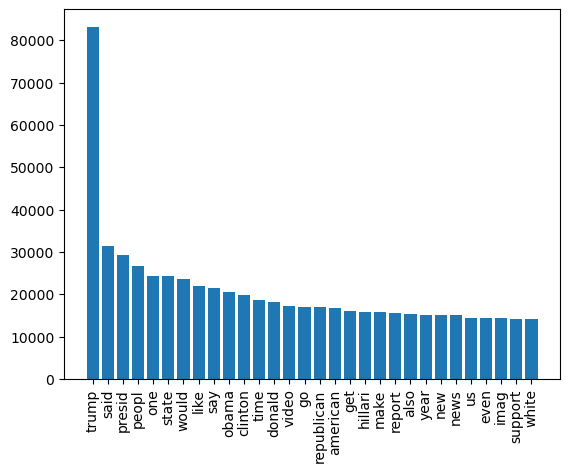

In [40]:
plt.bar(pd.DataFrame(Counter(fake).most_common(30))[0],pd.DataFrame(Counter(fake).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### bar plot of 30 common words of true news

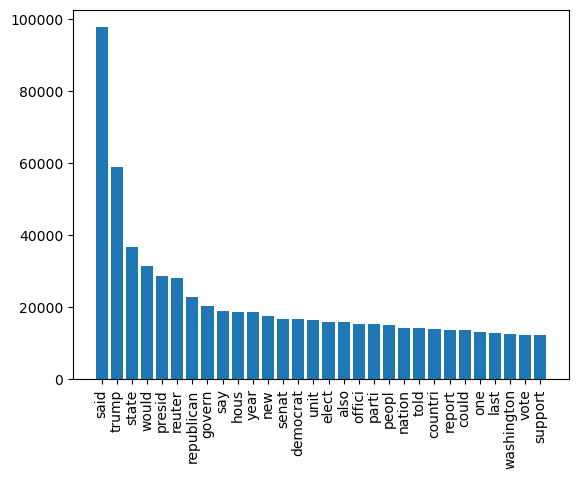

In [41]:
plt.bar(pd.DataFrame(Counter(true).most_common(30))[0],pd.DataFrame(Counter(true).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

* now we need to convert text into numbers or vectors or vectorize

* so we use Text Vectorization : using bag of words
* in bag of words:   we create a column for frequency of all the words and we check the frequency in each msg
and this frequency of each msg becomes our vector

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()


In [43]:
X = data['transformed_content']
y = data['label']

In [44]:
## train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
tfidf = TfidfVectorizer()
X_train_vec = tfidf.fit_transform(X_train)

X_test_vec = tfidf.transform(X_test)

In [46]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, classification_report

bnb = BernoulliNB()
mnb = MultinomialNB()

In [47]:
bnb.fit(X_train_vec,y_train)
y_pred2 = bnb.predict(X_test_vec)
print("accuracy:",accuracy_score(y_test,y_pred2))
print("confusion matrix:",confusion_matrix(y_test,y_pred2))
print("precision:",precision_score(y_test,y_pred2))

accuracy: 0.966547326023719
confusion matrix: [[4487  161]
 [ 138 4152]]
precision: 0.962670994667285


* here the precision is 96%, false postives and false negatives are low

In [48]:
mnb.fit(X_train_vec,y_train)
y_pred3 = mnb.predict(X_test_vec)
print("accuracy:",accuracy_score(y_test,y_pred3))
print("confusion matrix:",confusion_matrix(y_test,y_pred3))
print("precision:",precision_score(y_test,y_pred3))

accuracy: 0.932423360930857
confusion matrix: [[4404  244]
 [ 360 3930]]
precision: 0.9415428845232391


* here the precision is 94%, false postives and false negatives are comparatively more.

### Insights:

* Bernoulli Naive Bayes is performing better overall in our case — higher accuracy, lower misclassification.

### Training with other classification models

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [50]:
models = {
    "Multinomial Naive Bays": MultinomialNB(),
    "Bernouli Naive Bays": BernoulliNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Classifier": SVC(kernel='sigmoid', gamma=1.0),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=6),
    "Kneighbors Classifier": KNeighborsClassifier(),
    "Ada  boost Classifier": AdaBoostClassifier(n_estimators=50),
    "Bagging Classifier": BaggingClassifier(n_estimators=50),
    "Gradient Boost Classifier": GradientBoostingClassifier(n_estimators=50),
    "XGB Classifier": XGBClassifier(n_estimators=50)

}

accuracy = []
precision = []
names = []
for name, model in models.items():
    print(f"\n----- {name} -----")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Precision:",prec)

    names.append(name)
    accuracy.append(acc)
    precision.append(prec)
    

    print('='*60)



----- Multinomial Naive Bays -----
Accuracy: 0.932423360930857
Confusion Matrix:
 [[4404  244]
 [ 360 3930]]
Precision: 0.9415428845232391

----- Bernouli Naive Bays -----
Accuracy: 0.966547326023719
Confusion Matrix:
 [[4487  161]
 [ 138 4152]]
Precision: 0.962670994667285

----- Logistic Regression -----
Accuracy: 0.9840008950548221
Confusion Matrix:
 [[4576   72]
 [  71 4219]]
Precision: 0.9832206944768119

----- Random Forest -----
Accuracy: 0.9903781606623405
Confusion Matrix:
 [[4617   31]
 [  55 4235]]
Precision: 0.9927332395686826

----- Support Vector Classifier -----
Accuracy: 0.9911613336316849
Confusion Matrix:
 [[4605   43]
 [  36 4254]]
Precision: 0.9899930183849197

----- Decision Tree Classifier -----
Accuracy: 0.9950771984784068
Confusion Matrix:
 [[4613   35]
 [   9 4281]]
Precision: 0.991890639481001

----- Kneighbors Classifier -----
Accuracy: 0.8740210337883195
Confusion Matrix:
 [[3804  844]
 [ 282 4008]]
Precision: 0.8260511129431163

----- Ada  boost Classifier

## Conclusion:
* The best model came out to be XGB classifier with low false positives and false negatives along with high accuracy and high precision.

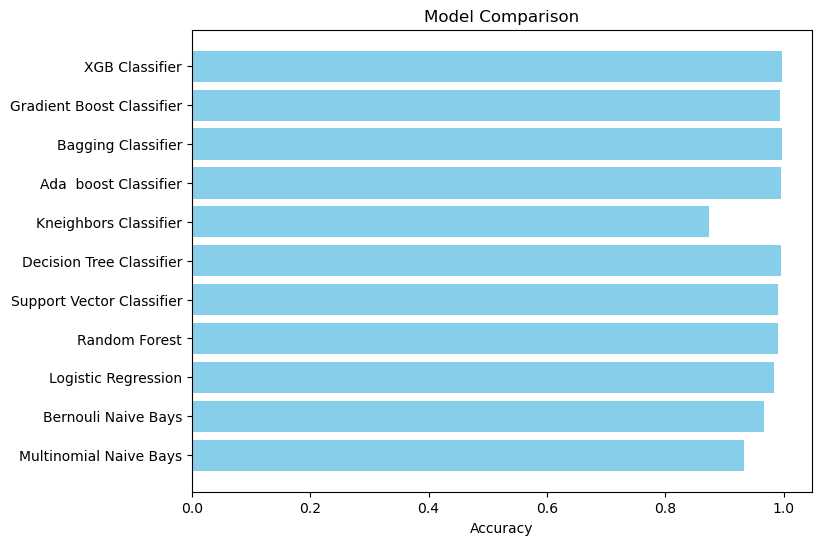

In [51]:
plt.figure(figsize=(8,6))
plt.barh(names, accuracy, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.show()

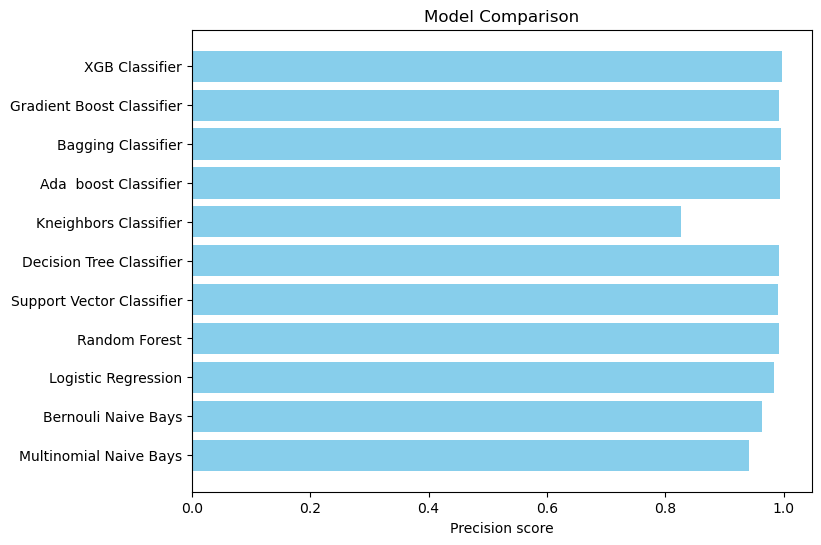

In [52]:
plt.figure(figsize=(8,6))
plt.barh(names, precision, color='skyblue')
plt.xlabel("Precision score")
plt.title("Model Comparison")
plt.show()

## Insights:
* From the above bar graphs, it is clear that XGB classifier has high accuracy and high precision.

## Testing

In [ ]:
best_model = XGBClassifier(n_estimators = 50)
best_model.fit(X_train_vec,y_train)

In [ ]:
sample_input = ["Breaking: COVID vaccine proven 100% effective in new study!"]
#sample_input = ["budget fight loom republican flip fiscal"]

## preprocess
clean_sample = [clean_text(i) for i in sample_input]

## vectorizing
vectorize_sample = tfidf.transform(clean_sample)

## predict with best model
prediction = best_model.predict(vectorize_sample)

## output
print("Prediction:", "REAL" if prediction[0] == 1 else "FAKE")
